In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [27]:
# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [28]:
# Load the dataset
file_path = "transactions_with_fraud.csv"  # Replace with your dataset's path
data = pd.read_csv(file_path)

In [29]:
# Display first few rows
print("Dataset Preview:")
display(data.head())

Dataset Preview:


,transaction_id,amount,currency,created,captured,status,city,country,state,postal_code,...,last4,exp_month,exp_year,cvc_check,risk_level,risk_score,network_status,seller_message,fraud_reason,is_fraud
0,c26ee9f9-0d65-4b89-98e4-13c8f2876bab,1000,eur,1613730412,False,succeeded,Kristinhaven,US,Utah,66270,...,9610,5,2035,pass,elevated,40,declined_by_network,Payment failed.,NaN,True
1,b1c4981c-2e37-447a-92ab-59f29e84d2ef,1514,eur,1727729019,False,pending,North Lisamouth,US,Delaware,67020,...,5509,5,2035,fail,normal,46,approved_by_network,Payment complete.,Fraudulent,True
2,985b37c0-e700-416b-92f5-f578c96a53b7,50,eur,1660816953,False,succeeded,West Kelsey,US,Maryland,594,...,1498,5,2026,pass,normal,79,declined_by_network,Payment failed.,NaN,True
3,63a056cd-df5d-411b-8180-b6aa3aef12c2,2000,eur,1697940703,True,succeeded,Rickyhaven,US,Georgia,51424,...,6135,9,2027,fail,normal,28,approved_by_network,Payment failed.,NaN,True
4,ed0cb659-096b-45a3-beec-5581381fecec,1000,usd,1680874645,True,succeeded,Curtisville,US,Utah,67111,...,3783,7,2033,pass,normal,26,approved_by_network,Payment complete.,Warning,True


In [30]:
# Display dataset info
print("\nDataset Information:")
data.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348000 entries, 0 to 347999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   transaction_id  348000 non-null  object
 1   amount          348000 non-null  int64 
 2   currency        348000 non-null  object
 3   created         348000 non-null  int64 
 4   captured        348000 non-null  bool  
 5   status          348000 non-null  object
 6   city            348000 non-null  object
 7   country         348000 non-null  object
 8   state           348000 non-null  object
 9   postal_code     348000 non-null  int64 
 10  email           348000 non-null  object
 11  name            348000 non-null  object
 12  phone           348000 non-null  object
 13  card_brand      348000 non-null  object
 14  last4           348000 non-null  int64 
 15  exp_month       348000 non-null  int64 
 16  exp_year        348000 non-null  int64 
 17  cvc_che

In [31]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
transaction_id         0
amount                 0
currency               0
created                0
captured               0
status                 0
city                   0
country                0
state                  0
postal_code            0
email                  0
name                   0
phone                  0
card_brand             0
last4                  0
exp_month              0
exp_year               0
cvc_check              0
risk_level             0
risk_score             0
network_status         0
seller_message         0
fraud_reason      243203
is_fraud               0
dtype: int64


In [32]:
# Fill missing values if necessary
# Example: Filling missing 'state' with 'Unknown'
if "state" in data.columns:
    data["state"].fillna("Unknown", inplace=True)

# Convert 'created' to datetime if applicable
if "created" in data.columns:
    data["created"] = pd.to_datetime(data["created"])

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_37448\2627510680.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["state"].fillna("Unknown", inplace=True)


In [33]:
# Descriptive statistics
print("\nDescriptive Statistics:")
display(data.describe())



Descriptive Statistics:


,amount,created,postal_code,last4,exp_month,exp_year,risk_score
count,348000.000000,348000,348000.000000,348000.000000,348000.000000,348000.000000,348000.000000
mean,1445.965583,1970-01-01 00:00:01.672535266,50222.610718,4997.734874,6.506595,2029.992480,50.458753
min,50.000000,1970-01-01 00:00:01.609459369,501.000000,0.000000,1.000000,2025.000000,1.000000
25%,100.000000,1970-01-01 00:00:01.640930889,25305.000000,2491.000000,4.000000,2027.000000,25.000000
50%,500.000000,1970-01-01 00:00:01.672464630,50276.500000,4997.000000,7.000000,2030.000000,50.000000
75%,2000.000000,1970-01-01 00:00:01.704098828,75001.000000,7505.000000,10.000000,2033.000000,75.000000
max,10000.000000,1970-01-01 00:00:01.735689514,99950.000000,9999.000000,12.000000,2035.000000,100.000000
std,2091.373651,NaN,28709.324208,2889.057037,3.451174,3.161515,28.852687


C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_37448\721795566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="is_fraud", palette="Set2")


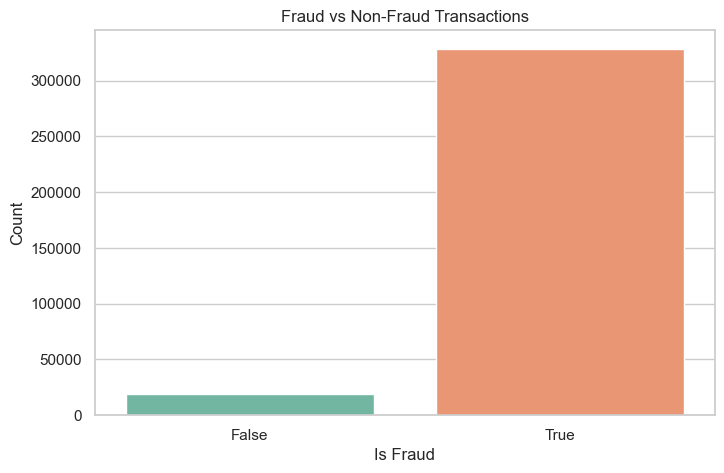

In [34]:
# --- Part 1: Overview and distribution plots ---

# Plot fraud vs non-fraud transactions
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="is_fraud", palette="Set2")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

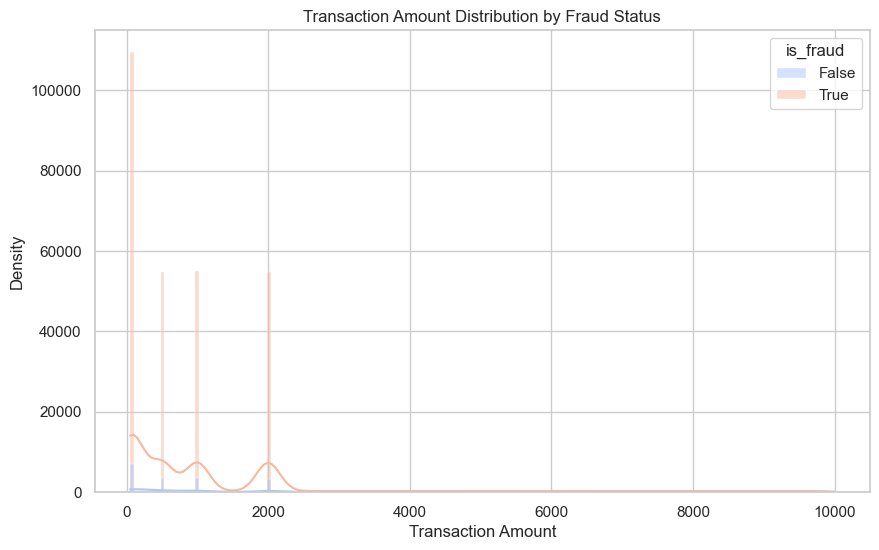

In [35]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="amount", hue="is_fraud", kde=True, palette="coolwarm")
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.show()

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_37448\3131024180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y="currency", palette="viridis", order=data["currency"].value_counts().index)


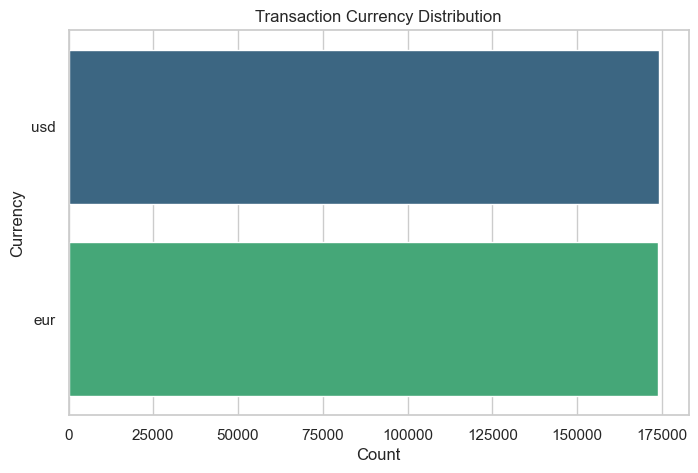

In [36]:
# Currency distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y="currency", palette="viridis", order=data["currency"].value_counts().index)
plt.title("Transaction Currency Distribution")
plt.xlabel("Count")
plt.ylabel("Currency")
plt.show()


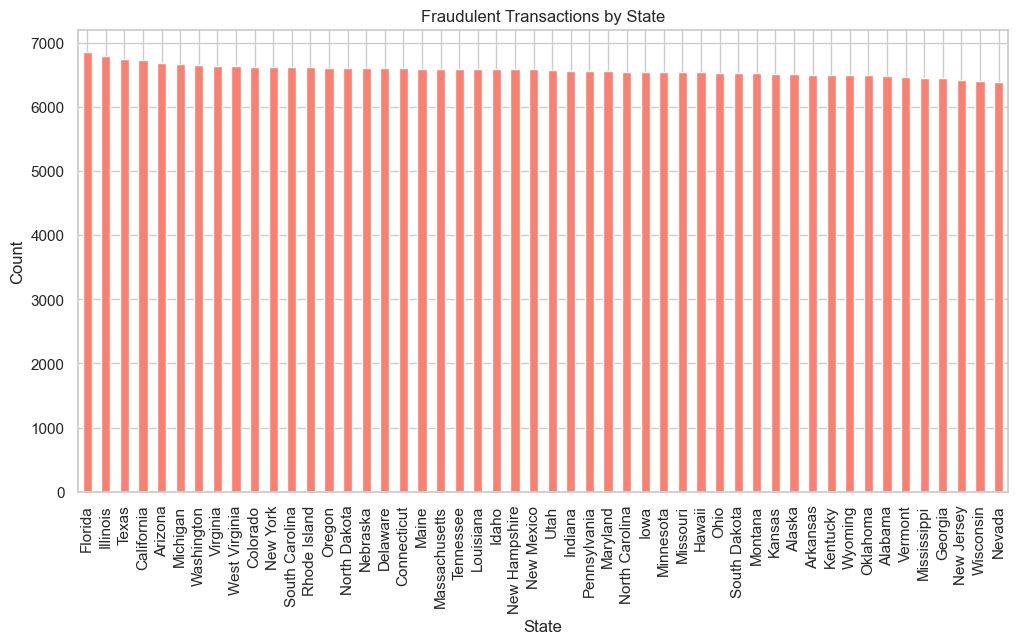

In [38]:
# Geographic distribution of fraud
if "state" in data.columns:
    state_fraud = data[data["is_fraud"] == 1]["state"].value_counts()
    plt.figure(figsize=(12, 6))
    state_fraud.plot(kind="bar", color="salmon")
    plt.title("Fraudulent Transactions by State")
    plt.xlabel("State")
    plt.ylabel("Count")
    plt.show()

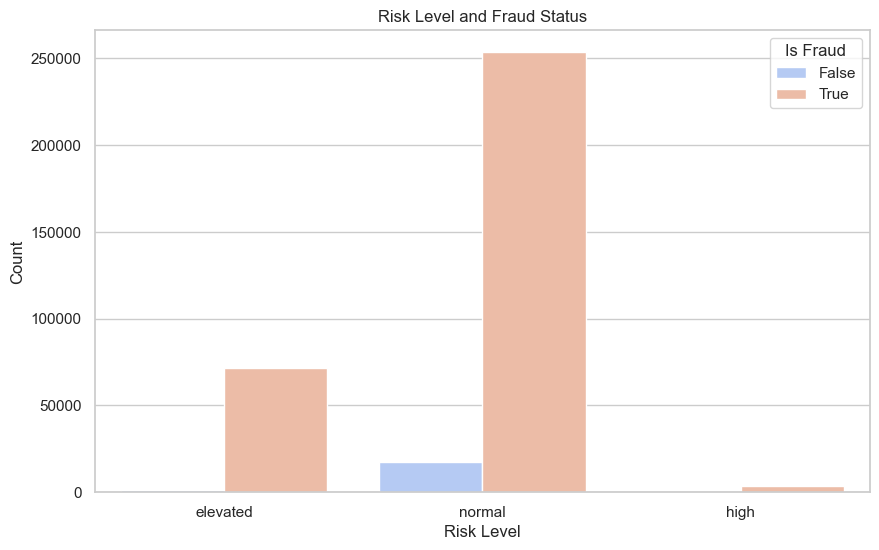

In [39]:
# --- Part 3: Risk analysis ---

# Risk level vs fraud status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="risk_level", hue="is_fraud", palette="coolwarm")
plt.title("Risk Level and Fraud Status")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()

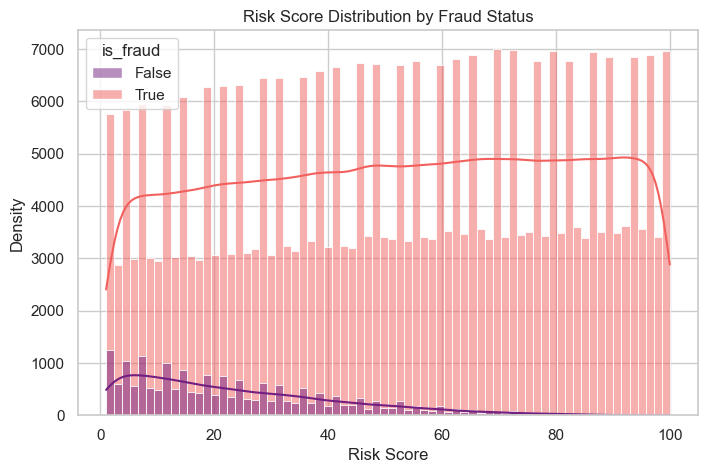

In [40]:
# Risk score distribution
if "risk_score" in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x="risk_score", hue="is_fraud", kde=True, palette="magma")
    plt.title("Risk Score Distribution by Fraud Status")
    plt.xlabel("Risk Score")
    plt.ylabel("Density")
    plt.show()


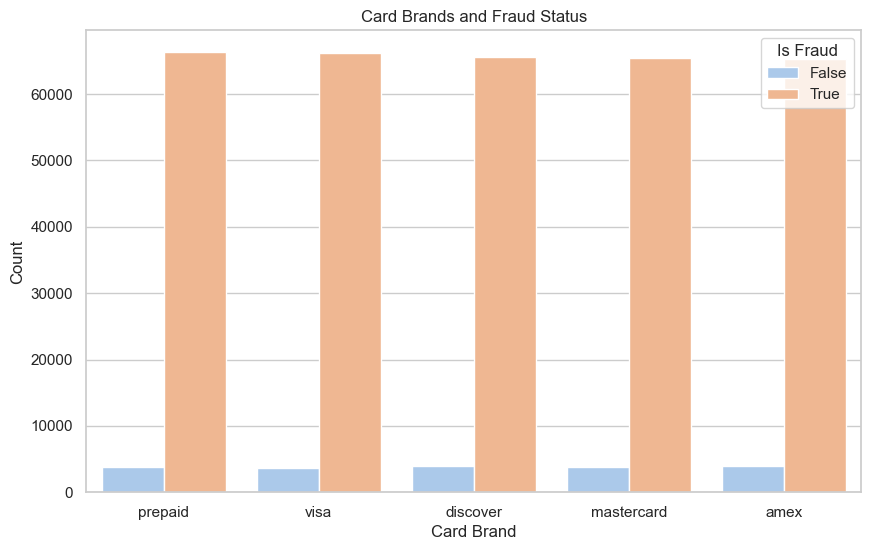

In [41]:
# --- Part 4: Card details analysis ---

# Card brands in fraud vs non-fraud
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="card_brand", hue="is_fraud", palette="pastel", order=data["card_brand"].value_counts().index)
plt.title("Card Brands and Fraud Status")
plt.xlabel("Card Brand")
plt.ylabel("Count")
plt.legend(title="Is Fraud")
plt.show()

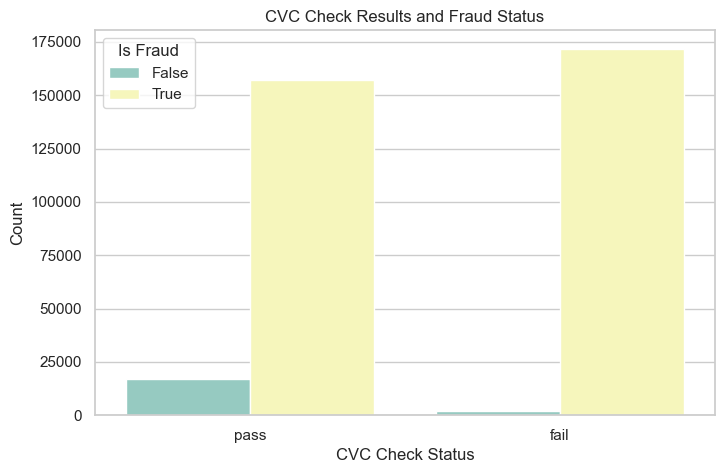

In [42]:
# CVC check status
if "cvc_check" in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x="cvc_check", hue="is_fraud", palette="Set3")
    plt.title("CVC Check Results and Fraud Status")
    plt.xlabel("CVC Check Status")
    plt.ylabel("Count")
    plt.legend(title="Is Fraud")
    plt.show()

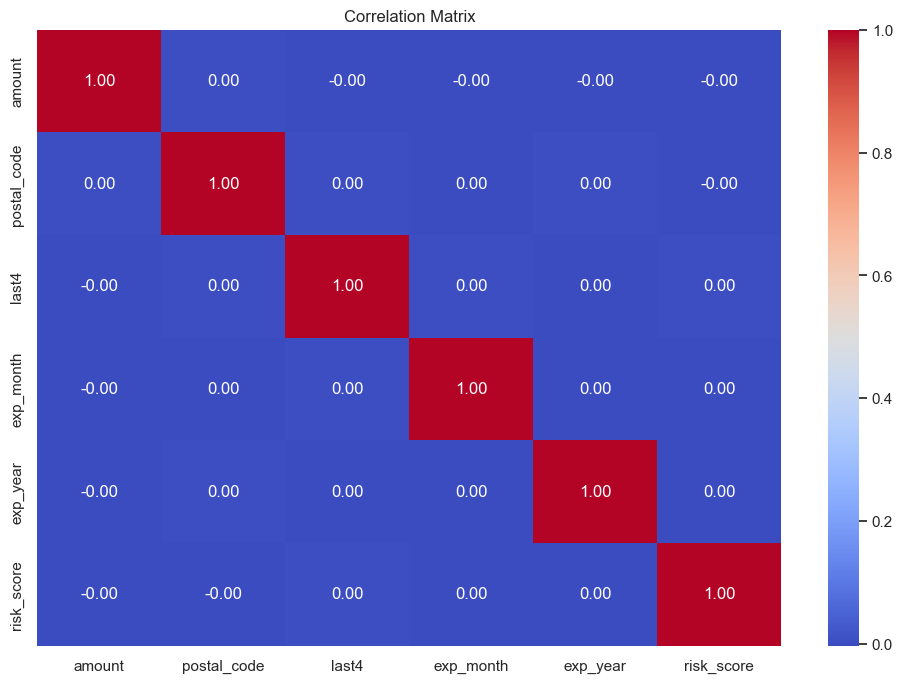

In [43]:
# --- Part 5: Correlations and relationships ---

# Correlation matrix for numerical variables
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

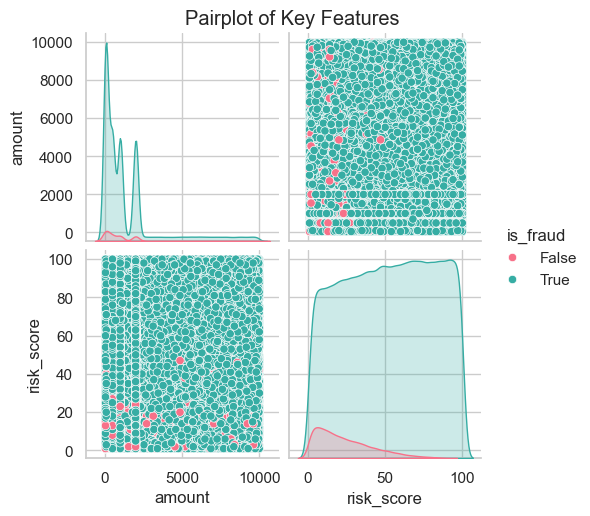

In [44]:
# Pairplot of selected features
selected_features = ["amount", "risk_score", "is_fraud"]
sns.pairplot(data[selected_features], hue="is_fraud", palette="husl")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_37448\2104730335.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_fraud.index, y=country_fraud.values, palette="cubehelix")


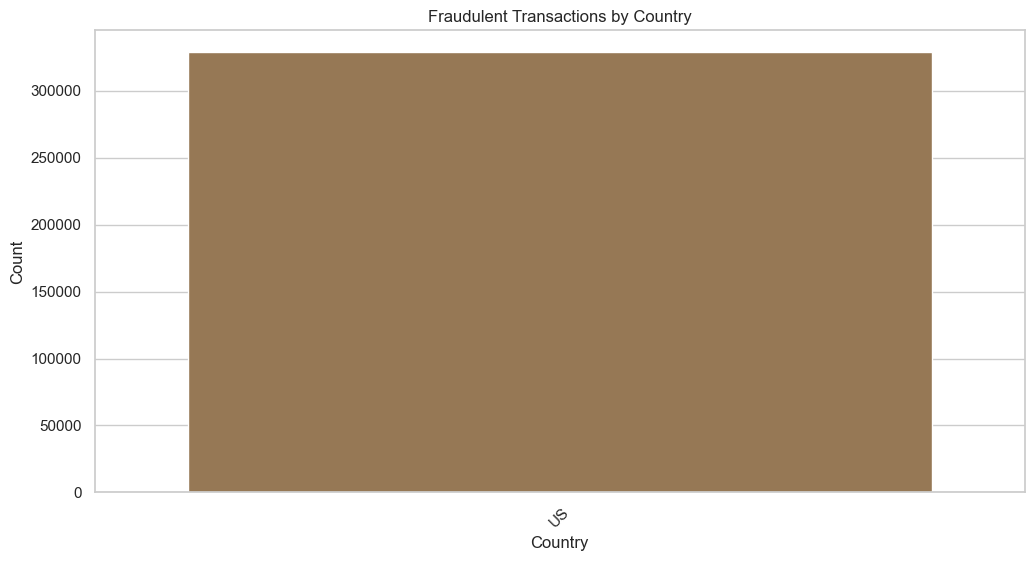

In [45]:
# --- Part 6: Comparative analysis ---

# Fraudulent transactions by country
if "country" in data.columns:
    country_fraud = data[data["is_fraud"] == 1]["country"].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_fraud.index, y=country_fraud.values, palette="cubehelix")
    plt.title("Fraudulent Transactions by Country")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_37448\432838825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_reasons.index, y=fraud_reasons.values, palette="autumn")


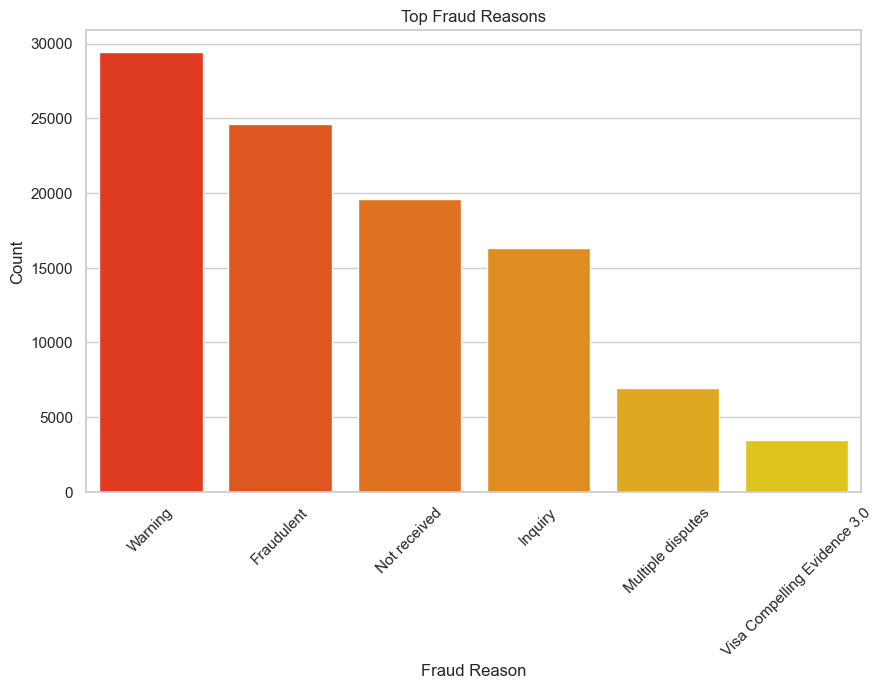

In [46]:
# Seller messages and fraud reasons
if "fraud_reason" in data.columns:
    fraud_reasons = data[data["is_fraud"] == 1]["fraud_reason"].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=fraud_reasons.index, y=fraud_reasons.values, palette="autumn")
    plt.title("Top Fraud Reasons")
    plt.xlabel("Fraud Reason")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()